In [0]:
!wget https://github.com/daniarnaizg/TFG-Amazon-Scraper/raw/master/datasets/dataset-cara.zip

--2019-06-01 11:02:05--  https://github.com/daniarnaizg/TFG-Amazon-Scraper/raw/master/datasets/dataset-cara.zip
Resolving github.com (github.com)... 192.30.253.112
Connecting to github.com (github.com)|192.30.253.112|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://media.githubusercontent.com/media/daniarnaizg/TFG-Amazon-Scraper/master/datasets/dataset-cara.zip [following]
--2019-06-01 11:02:05--  https://media.githubusercontent.com/media/daniarnaizg/TFG-Amazon-Scraper/master/datasets/dataset-cara.zip
Resolving media.githubusercontent.com (media.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to media.githubusercontent.com (media.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 103586210 (99M) [application/zip]
Saving to: ‘dataset-cara.zip’

dataset-cara.zip    100%[===================>]  98.79M   175MB/s    in 0.6s    

2019-06-01 11:02:07 (175 M

In [0]:
!unzip -a dataset-cara.zip

In [0]:
!ls dataset-cara

0  1


In [0]:
import matplotlib.pyplot as plt

import numpy as np
import glob
import cv2
import os

from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D
from keras.layers import Flatten, Lambda, BatchNormalization
from keras.models import Sequential
from keras.layers.advanced_activations import LeakyReLU
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.preprocessing.image import img_to_array
from keras.utils import to_categorical

from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [0]:
'''Config of the model'''

EPOCHS = 10     # Number of training epochs
INIT_LR = 1e-3  # Initial Learning rate
BS = 32         # Batch size

data = []
labels = []

In [0]:
'''
Extraction of the data and label of every image.
'''
for folder in os.listdir('dataset-cara/'):
  dir = 'dataset-cara/' + folder + '/*.jpg'
  class_dir = glob.glob(dir)
  for imagePath in class_dir:
    image = cv2.imread(imagePath)
    image = cv2.resize(image, (28, 28))
    image = img_to_array(image)
    data.append(image)
    labels.append(folder) # The label is the  folder each image is in

In [0]:
# scale the raw pixel intensities to the range [0, 1]
data = np.array(data, dtype="float") / 255.0
labels = np.array(labels)

In [0]:
# partition the data into training and testing splits using 75% of
# the data for training and the remaining 25% for testing
(trainX, testX, trainY, testY) = train_test_split(data,
	labels, test_size=0.25, random_state=42)

In [0]:
trainX.shape

(594, 28, 28, 3)

In [0]:
trainY.shape

(594,)

In [0]:
# convert the labels from integers to vectors
trainY = to_categorical(trainY, num_classes=2)
testY = to_categorical(testY, num_classes=2)

In [0]:
trainY.shape

(594, 2)

In [0]:
'''Initialization of the model'''
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 3)))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

optimizer = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
model.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["accuracy"])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
model_path = "clasificador-caras.h5"

In [0]:
'''Train the network'''
model.fit(trainX, trainY, batch_size=BS, validation_data=(testX, testY), epochs=EPOCHS, verbose=1)
model.save(model_path)

score = model.evaluate(testX, testY, verbose=1)


print('Test loss: ' + str(score[0]))
print('Test accuracy: ' + str(score[1]))

Instructions for updating:
Use tf.cast instead.
Train on 594 samples, validate on 198 samples
Epoch 1/10
594/594 [==============================] - 2s 4ms/step - loss: 0.7223 - acc: 0.7508 - val_loss: 0.4951 - val_acc: 0.8081
Epoch 2/10
594/594 [==============================] - 2s 3ms/step - loss: 0.4979 - acc: 0.8131 - val_loss: 0.5158 - val_acc: 0.8081
Epoch 3/10
594/594 [==============================] - 2s 3ms/step - loss: 0.4681 - acc: 0.8131 - val_loss: 0.4917 - val_acc: 0.8081
Epoch 4/10
594/594 [==============================] - 2s 3ms/step - loss: 0.4400 - acc: 0.8131 - val_loss: 0.4773 - val_acc: 0.8081
Epoch 5/10
594/594 [==============================] - 2s 3ms/step - loss: 0.4105 - acc: 0.8232 - val_loss: 0.4787 - val_acc: 0.8131
Epoch 6/10
594/594 [==============================] - 2s 3ms/step - loss: 0.3902 - acc: 0.8266 - val_loss: 0.4578 - val_acc: 0.7980
Epoch 7/10
594/594 [==============================] - 2s 3ms/step - loss: 0.3441 - acc: 0.8434 - val_loss: 0.4638 

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               2769408   
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 1026      
Total para

Predicción:  Sin cara


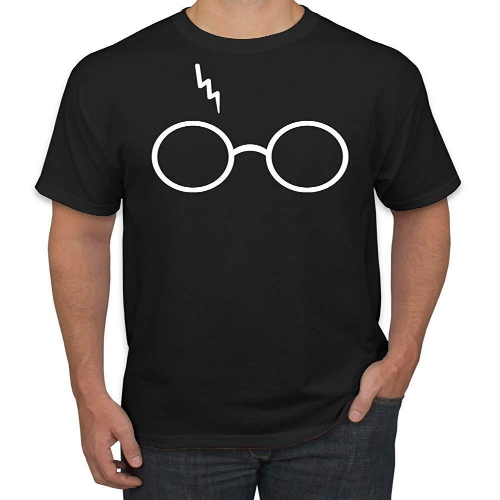

In [0]:
import cv2
from google.colab.patches import cv2_imshow

# load the image
image = cv2.imread("dataset-cara/1/Sin cara_101.jpg")
original = image.copy()

# pre-process the image for classification
image = cv2.resize(image, (28, 28))
image = image.astype("float") / 255.0
image = img_to_array(image)
image = np.expand_dims(image, axis=0)

predictions = model.predict(image)[0]
prediction = int(predictions.argmax())

final_prediction = ''
if prediction is 0:
    final_prediction = "Cara"
else:
    final_prediction = "Sin cara"

print("Predicción: ", final_prediction)
peq = cv2.resize(original, (500, 500))
cv2_imshow(peq)

In [0]:
!ls dataset-cara/1

'Sin cara_101.jpg'  'Sin cara_256.jpg'	'Sin cara_427.jpg'  'Sin cara_59.jpg'
'Sin cara_105.jpg'  'Sin cara_258.jpg'	'Sin cara_428.jpg'  'Sin cara_5.jpg'
'Sin cara_117.jpg'  'Sin cara_266.jpg'	'Sin cara_429.jpg'  'Sin cara_619.jpg'
'Sin cara_11.jpg'   'Sin cara_26.jpg'	'Sin cara_437.jpg'  'Sin cara_624.jpg'
'Sin cara_125.jpg'  'Sin cara_275.jpg'	'Sin cara_439.jpg'  'Sin cara_629.jpg'
'Sin cara_129.jpg'  'Sin cara_28.jpg'	'Sin cara_440.jpg'  'Sin cara_631.jpg'
'Sin cara_130.jpg'  'Sin cara_295.jpg'	'Sin cara_441.jpg'  'Sin cara_632.jpg'
'Sin cara_132.jpg'  'Sin cara_302.jpg'	'Sin cara_452.jpg'  'Sin cara_635.jpg'
'Sin cara_13.jpg'   'Sin cara_307.jpg'	'Sin cara_456.jpg'  'Sin cara_638.jpg'
'Sin cara_145.jpg'  'Sin cara_315.jpg'	'Sin cara_459.jpg'  'Sin cara_647.jpg'
'Sin cara_148.jpg'  'Sin cara_316.jpg'	'Sin cara_477.jpg'  'Sin cara_64.jpg'
'Sin cara_154.jpg'  'Sin cara_317.jpg'	'Sin cara_487.jpg'  'Sin cara_650.jpg'
'Sin cara_16.jpg'   'Sin cara_320.jpg'	'Sin cara_492.jpg'  'Sin cara_6

In [0]:
from google.colab import files
files.download('clasificador-caras.h5')